# CORD-19 Data Analysis
## Part 1: Data Loading and Exploration
Loading metadata.csv (~257 MB, ~400K rows) to explore the dataset structure, dimensions, data types, missing values, and basic statistics.

In [1]:
import pandas as pd

# Load sample_metadata.csv (10,000 rows, ~10 MB)
df = pd.read_csv('sample_metadata.csv', low_memory=False)

# First few rows
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [2]:
# DataFrame dimensions (rows, columns)
print('Shape:', df.shape)

Shape: (10000, 19)


In [3]:
# Data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          10000 non-null  object 
 1   sha               7717 non-null   object 
 2   source_x          10000 non-null  object 
 3   title             10000 non-null  object 
 4   doi               10000 non-null  object 
 5   pmcid             10000 non-null  object 
 6   pubmed_id         10000 non-null  int64  
 7   license           10000 non-null  object 
 8   abstract          7857 non-null   object 
 9   publish_time      10000 non-null  object 
 10  authors           9399 non-null   object 
 11  journal           9948 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    7717 non-null   object 
 16  pmc_json_files    6789 non-null   object 

In [4]:
# Missing values in key columns
key_columns = ['title', 'abstract', 'publish_time', 'authors', 'journal']
print('Missing values:\n', df[key_columns].isnull().sum())

Missing values:
 title              0
abstract        2143
publish_time       0
authors          601
journal           52
dtype: int64


In [5]:
# Basic statistics for numerical columns
print(df.describe())

          pubmed_id  mag_id  who_covidence_id  arxiv_id  s2_id
count  1.000000e+04     0.0               0.0       0.0    0.0
mean   2.252147e+07     NaN               NaN       NaN    NaN
std    9.029613e+06     NaN               NaN       NaN    NaN
min    2.142000e+03     NaN               NaN       NaN    NaN
25%    1.729189e+07     NaN               NaN       NaN    NaN
50%    2.499435e+07     NaN               NaN       NaN    NaN
75%    3.012746e+07     NaN               NaN       NaN    NaN
max    3.238719e+07     NaN               NaN       NaN    NaN


## Part 2: Data Cleaning and Preparation
Cleaning sample_metadata.csv by handling missing values, converting publish_time to datetime, extracting year, and adding abstract word count. Saving to cleaned_metadata.csv..

In [6]:
# Check missing values
key_columns = ['title', 'abstract', 'publish_time', 'authors', 'journal']
print('Missing values before cleaning:\n', df[key_columns].isnull().sum())

# Drop rows where title or publish_time is missing
df = df.dropna(subset=['title', 'publish_time'])

# Fill missing abstracts with 'No abstract available'
df['abstract'] = df['abstract'].fillna('No abstract available')

# Fill missing journals/authors with 'Unknown'
df['journal'] = df['journal'].fillna('Unknown')
df['authors'] = df['authors'].fillna('Unknown')

# Verify missing values after cleaning
print('\nMissing values after cleaning:\n', df[key_columns].isnull().sum())

Missing values before cleaning:
 title              0
abstract        2143
publish_time       0
authors          601
journal           52
dtype: int64

Missing values after cleaning:
 title           0
abstract        0
publish_time    0
authors         0
journal         0
dtype: int64


In [7]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year from publish_time
df['year'] = df['publish_time'].dt.year

# Check for invalid dates (NaT)
print('Invalid dates (NaT):', df['publish_time'].isna().sum())

# Drop rows with invalid dates
df = df.dropna(subset=['publish_time'])
print('Shape after dropping invalid dates:', df.shape)

Invalid dates (NaT): 923
Shape after dropping invalid dates: (9077, 20)


In [8]:
# Add abstract word count column
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))
print('Sample word counts:\n', df[['title', 'abstract_word_count']].head())

Sample word counts:
                                                title  abstract_word_count
0  Clinical features of culture-proven Mycoplasma...                  262
1  Nitric oxide: a pro-inflammatory mediator in l...                  142
2    Surfactant protein-D and pulmonary host defense                  219
3               Role of endothelin-1 in lung disease                   68
4  Gene expression in epithelial cells in respons...                  110


In [9]:
# Save cleaned dataset
df.to_csv('cleaned_metadata.csv', index=False)
print('Cleaned data saved to cleaned_metadata.csv, shape:', df.shape)

Cleaned data saved to cleaned_metadata.csv, shape: (9077, 21)


## Part 3: Data Analysis and Visualization
Analyzing cleaned_metadata.csv to count papers by year, identify top journals, find frequent words in titles, and visualize with bar charts, word cloud, and source distribution. Saving plots to plots/ folder.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Create plots folder if not exists
os.makedirs('plots', exist_ok=True)

# Load cleaned data
df = pd.read_csv('cleaned_metadata.csv', low_memory=False)
print('Loaded shape:', df.shape)

Loaded shape: (9077, 21)


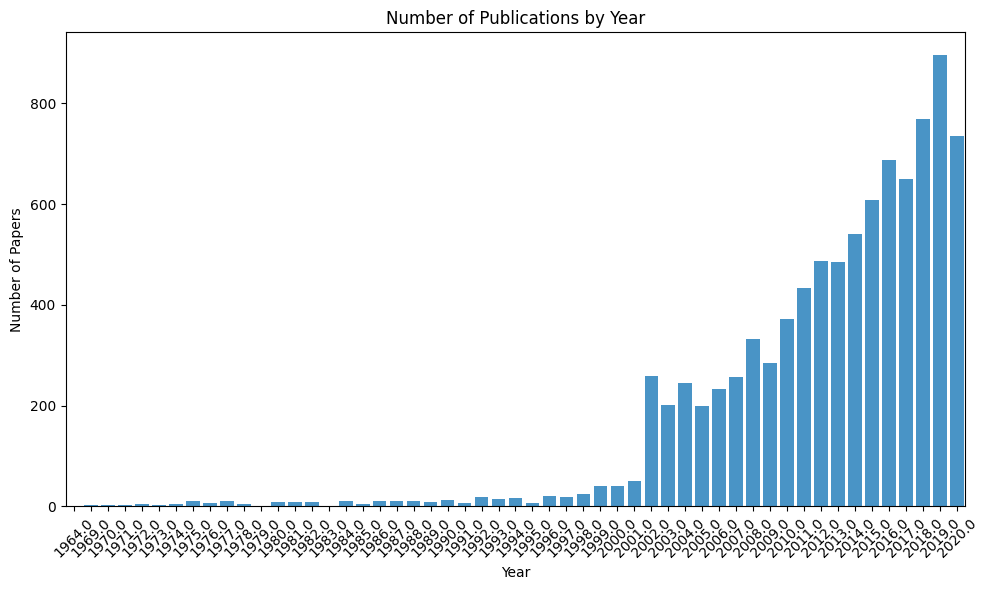

In [11]:
# Count papers by year
year_counts = df['year'].value_counts().sort_index()

# Plot publications over time (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='#3498db')
plt.title('Number of Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/publications_by_year.png')
plt.show()

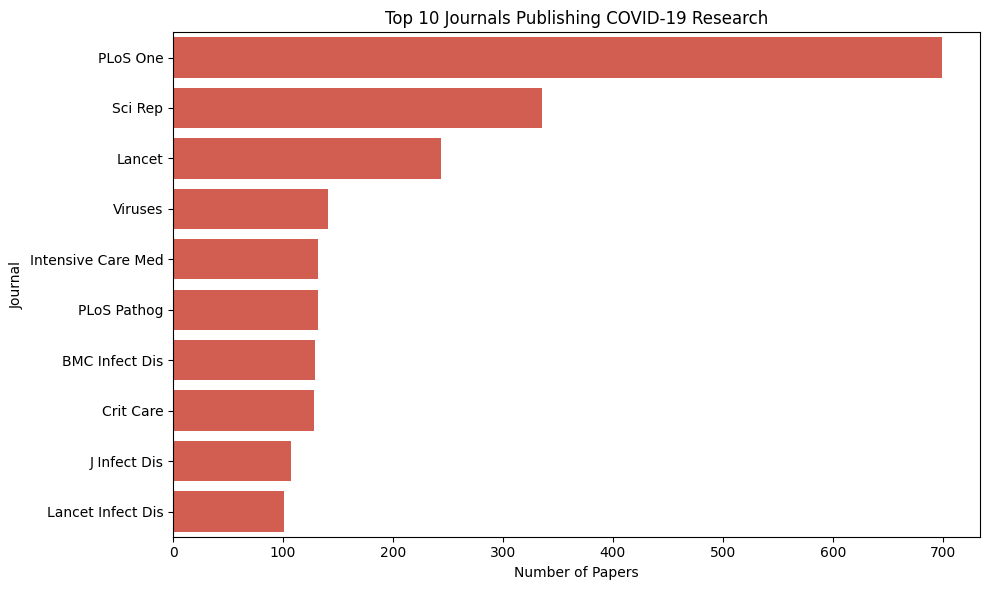

In [12]:
# Top 10 journals by paper count
top_journals = df['journal'].value_counts().head(10)

# Plot top journals (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.values, y=top_journals.index, color='#e74c3c')
plt.title('Top 10 Journals Publishing COVID-19 Research')
plt.xlabel('Number of Papers')
plt.ylabel('Journal')
plt.tight_layout()
plt.savefig('plots/top_journals.png')
plt.show()

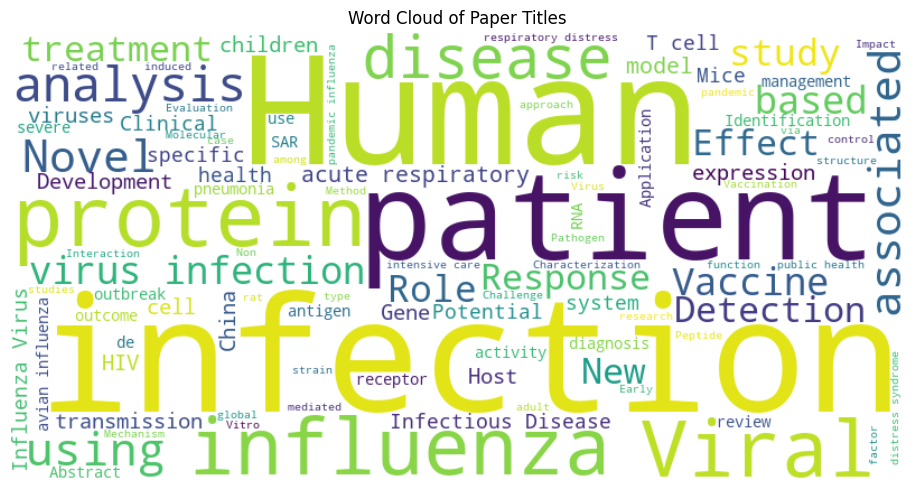

In [13]:
# Combine titles into single string
titles_text = ' '.join(df['title'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(titles_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.tight_layout()
plt.savefig('plots/title_wordcloud.png')
plt.show()

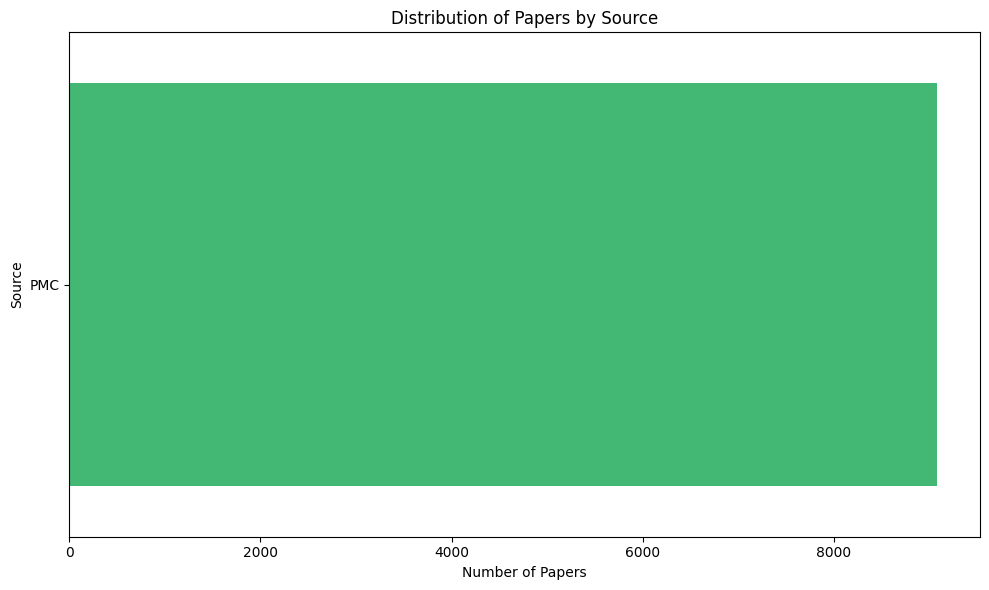

In [14]:
# Count papers by source_x (or fallback to journal if missing)
source_counts = df['source_x'].value_counts() if 'source_x' in df.columns else df['journal'].value_counts().head(10)

# Plot source distribution (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index, color='#2ecc71')
plt.title('Distribution of Papers by Source')
plt.xlabel('Number of Papers')
plt.ylabel('Source')
plt.tight_layout()
plt.savefig('plots/source_distribution.png')
plt.show()